In [1]:
from config import eia_key
import numpy as np
import pandas as pd
import requests
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#states list for url
states_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 

          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 

          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 

          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 

          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [3]:
#testing 123
# response=requests.get(f'http://api.eia.gov/series/?api_key={gkey}&series_id=SEDS.REPRB.CA.A')
# cali = response.json()

In [4]:
# help_me = dict(cali['series'][0]['data'][0:11])
# help_me.values()

In [5]:
states_df = pd.DataFrame({})

In [11]:
#api call. This is for overall renewable energy production per billion Btu
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={eia_key}&series_id=SEDS.REPRB.{state}.A')
    response=requests.get(url)
    all_states = response.json()
    states_data = dict(all_states['series'][0]['data'][0:11])
    states_df[state]= states_data.values()
states_data

ValueError: Length of values does not match length of index

In [12]:
states_df=states_df.transpose()

In [13]:
states_df = states_df.rename(columns=
                 {0:'2018',
                  1:'2017',
                  2:'2016',
                  3:'2015',
                  4:'2014',
                  5:'2013',
                  6:'2012',
                  7:'2011',
                  8:'2010',
                  9:'2009',
                  10:'2008'})

In [14]:
states_df = states_df[states_df.columns[::-1]]

##Overall energy production csv
states_df.to_csv("../input_data/AllEnergyProduced.csv")

In [15]:
renewable_energy_df = pd.DataFrame(states_df.mean(axis = 1))
avg_df_bot = renewable_energy_df.sort_values(0)
bottom_five_states = avg_df_bot.head(5)
print(bottom_five_states)

                  0
2008  141010.764706
2009  149508.039216
2010  163014.901961
2012  174235.666667
2011  182344.058824


In [16]:
avg_df_top = renewable_energy_df.sort_values(0, ascending = False)
top_five_states = avg_df_top.head(5)
print(top_five_states)

                  0
2018  225654.215686
2017  219527.901961
2016  204370.117647
2014  191500.333333
2015  190760.117647


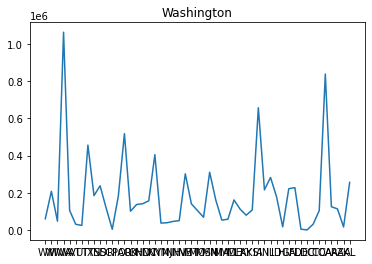

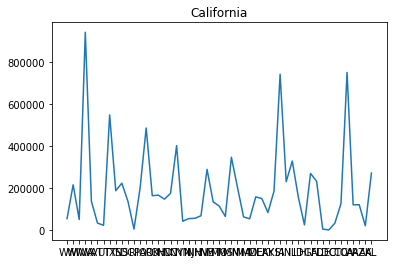

IndexError: single positional indexer is out-of-bounds

In [17]:
#ploting renewable energy (all sources) over time
plt.plot(states_df.iloc[-4])
plt.title("Washington")
plt.show()
plt.plot(states_df.iloc[4])
plt.title("California")
plt.show()
plt.plot(states_df.iloc[15])
plt.title("Iowa")
plt.show()
plt.plot(states_df.iloc[-8])
plt.title("Texas")
plt.show()
plt.plot(states_df.iloc[-14])
plt.title("Oregon")
plt.show()

In [18]:
#I put in 2017 for the change date because that is what we have for emissions data but can update easily
for row in states_df.iterrows():
    change_production = states_df["2017"]-states_df["2008"]
change_production = change_production.sort_values(0, ascending=False)
change_production.head(5)

KeyError: '2017'

In [19]:
plt.plot(states_df.iloc[36])
plt.title("Oklahoma")
plt.show()
plt.plot(states_df.iloc[27])
plt.title("Nebraska")
plt.show()
plt.plot(states_df.iloc[35])
plt.title("Ohio")
plt.show()

IndexError: single positional indexer is out-of-bounds

In [20]:
states_df.reset_index()

,index,WY,WI,WV,WA,VA,VT,UT,TX,TN,...,FL,DE,DC,CT,CO,CA,AR,AZ,AK,AL
0,2018,51450,224400,45435,938680,158108,41498,50330,903003,196518,...,249373,3384,1603,38245,154200,1023623,125039,154992,24117,276734
1,2017,55900,216737,41696,950948,138903,37830,53277,811457,176435,...,238863,3268,1316,33502,150632,1120569,115289,148625,23608,254958
2,2016,54545,219451,39606,930646,139965,35570,36544,714190,159791,...,223467,3102,1107,34222,147499,932768,115408,139231,25120,230731
3,2015,49730,218338,37954,872303,138537,38785,23993,586962,189390,...,223817,3517,824,33236,123965,738814,117808,129266,23807,258941
4,2014,54028,214934,50020,940937,136734,32832,22235,547503,186908,...,231370,4224,344,32677,125648,749645,119813,120149,19790,270743
5,2013,52908,204782,53863,928038,118391,33314,17178,500601,217500,...,234142,3795,305,30046,116979,744983,121310,98958,18629,313665
6,2012,53505,197963,44878,1019834,102372,26308,21019,469283,173295,...,223034,3581,285,26910,102686,705086,114237,98806,17796,242204
7,2011,60191,207867,47220,1063525,104936,30555,24387,456427,184814,...,227710,4172,290,30760,104147,838547,124987,113360,16078,255849
8,2010,44696,208904,45978,822184,110820,32420,17678,397186,168515,...,230259,3838,114,30357,82190,715878,126235,85935,16965,242243
9,2009,34009,171839,45121,832840,115242,31572,15951,304805,179235,...,213645,3577,49,29529,80116,647227,125695,80898,15685,264530


In [21]:
#data for state solar energy consumption over time
consumption_df=pd.DataFrame({})

In [23]:
for state in states_list:
    url=(f'http://api.eia.gov/series/?api_key={eia_key}&series_id=SEDS.SOTCB.{state}.A')
    response2=requests.get(url)
    all_states_cons = response2.json()
    states_data_cons = dict(all_states_cons['series'][0]['data'][0:11])
    consumption_df[state]= states_data_cons.values()

In [24]:
consumption_df=consumption_df.transpose()

In [26]:
consumption_df = consumption_df.rename(columns=
                 {0:'2018',
                  1:'2017',
                  2:'2016',
                  3:'2015',
                  4:'2014',
                  5:'2013',
                  6:'2012',
                  7:'2011',
                  8:'2010',
                  9:'2009',
                  10:'2008'})

consumption_df

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
AL,3425,1812,431,101,100,97,78,71,68,62,64
AK,28,20,14,3,3,3,3,3,3,3,2
AZ,70800,66326,52862,48236,43572,31405,18096,7604,4518,3445,3112
AR,2118,442,372,124,111,108,100,85,80,59,53
CA,381733,340408,267580,211876,156494,84832,53911,41816,36006,31297,29985
CO,15338,13974,9509,6271,6046,5186,3886,2865,1808,1148,819
CT,6486,5089,4130,2954,2241,1601,1295,1189,1137,1062,929
DC,651,481,295,304,292,253,240,203,80,22,20
DE,1492,1354,1133,1230,1189,1001,607,383,125,85,50
FL,53528,38265,30909,30189,29805,28428,27441,25868,24638,23273,23615


In [29]:
consumption_df = consumption_df[consumption_df.columns[::-1]]
consumption_df.to_csv("../input_data/consumption.csv")

In [30]:
energy_consumption_df = pd.DataFrame(consumption_df.mean(axis = 1))
avg_df_bot5 = energy_consumption_df.sort_values(0)
bottom_five = avg_df_bot5.head(5)
print(bottom_five)

            0
ND   5.818182
AK   7.727273
SD  11.454545
WY  23.272727
WV  81.818182


In [31]:
avg_top5 = energy_consumption_df.sort_values(0, ascending = False)
top_five = avg_top5.head(5)
print(top_five)

                0
CA  148721.636364
AZ   31816.000000
FL   30541.727273
NV   16617.454545
NC   15441.181818


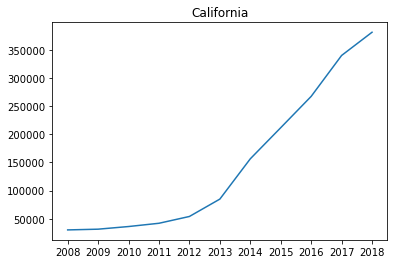

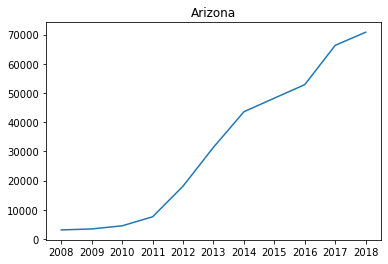

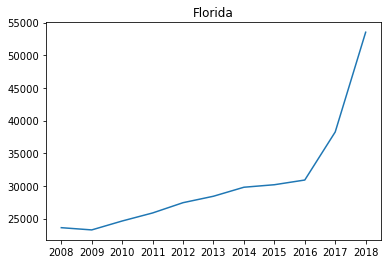

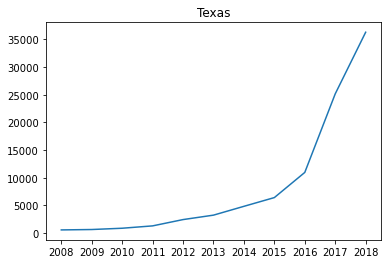

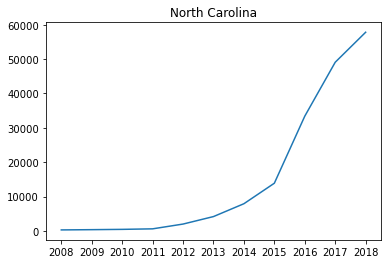

In [33]:
#ploting solar energy comsumption over time top 5
plt.plot(consumption_df.iloc[4])
plt.title("California")
plt.show()
plt.plot(consumption_df.iloc[2])
plt.title("Arizona")
plt.show()
plt.plot(consumption_df.iloc[9])
plt.title("Florida")
plt.show()
plt.plot(consumption_df.iloc[43])
plt.title("Texas")
plt.show()
plt.plot(consumption_df.iloc[33])
plt.title("North Carolina")
plt.show()

In [34]:
consumption_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
AL,64,62,68,71,78,97,100,101,431,1812,3425
AK,2,3,3,3,3,3,3,3,14,20,28
AZ,3112,3445,4518,7604,18096,31405,43572,48236,52862,66326,70800
AR,53,59,80,85,100,108,111,124,372,442,2118
CA,29985,31297,36006,41816,53911,84832,156494,211876,267580,340408,381733
CO,819,1148,1808,2865,3886,5186,6046,6271,9509,13974,15338
CT,929,1062,1137,1189,1295,1601,2241,2954,4130,5089,6486
DC,20,22,80,203,240,253,292,304,295,481,651
DE,50,85,125,383,607,1001,1189,1230,1133,1354,1492
FL,23615,23273,24638,25868,27441,28428,29805,30189,30909,38265,53528
